In [8]:
#Experiment was run with a d430 Node.

import pandas as pd

df = pd.read_csv("./query1_source16_thousands_results.csv")
desiredCols = ["sleepdisable", "rate", "policy", "pkg_watts_avg", "pkg_watts_std", "ram_watts_avg", "ram_watts_std", "SourcenumRecordsOutPerSecond_avg", "SourcenumRecordsOutPerSecond_std"]
df = df[desiredCols]

# Filtering out rows that didn't meet the specified range.
df = df[df["SourcenumRecordsOutPerSecond_avg"] >= (0.95*df["rate"])]

# Filtering out anomaly
df = df[df["ram_watts_avg"] >= 0]

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
dfEnabled = df[df["sleepdisable"] == 0]
dfDisabled = df[df["sleepdisable"] == 1]

display(dfEnabled)

,sleepdisable,rate,policy,pkg_watts_avg,pkg_watts_std,ram_watts_avg,ram_watts_std,SourcenumRecordsOutPerSecond_avg,SourcenumRecordsOutPerSecond_std
0,0,100000,ondemand,55.36,2.10,8.21,0.23,99988.170789,14.268690
2,0,200000,ondemand,87.58,1.41,9.84,0.23,200000.000000,0.000000
4,0,300000,ondemand,113.12,1.23,11.56,0.12,299964.060931,116.943320
6,0,400000,ondemand,143.77,1.11,12.69,0.31,398530.657336,769.397983
12,0,100000,conservative,59.13,1.69,8.53,0.22,99997.483728,17.277915
14,0,200000,conservative,85.81,1.51,9.62,0.19,199973.323322,229.686549
16,0,300000,conservative,116.51,1.04,12.11,0.14,299937.702894,127.802478
23,0,100000,performance,63.21,1.75,8.52,0.16,100000.000000,0.000000
25,0,200000,performance,82.23,1.77,9.65,0.17,199980.390285,108.380376
27,0,300000,performance,119.59,1.56,11.35,0.16,299998.563079,9.249322


In [9]:
display(dfDisabled)

,sleepdisable,rate,policy,pkg_watts_avg,pkg_watts_std,ram_watts_avg,ram_watts_std,SourcenumRecordsOutPerSecond_avg,SourcenumRecordsOutPerSecond_std
1,1,100000,ondemand,98.32,2.06,10.10,0.11,100000.000000,0.000000
3,1,200000,ondemand,112.15,1.47,11.05,0.10,199992.460202,228.613506
5,1,300000,ondemand,140.08,1.36,11.64,0.21,299995.498945,354.763166
7,1,400000,ondemand,144.81,0.44,12.59,0.23,397863.715033,1088.021290
13,1,100000,conservative,104.73,1.20,9.96,0.12,100000.000000,0.000000
15,1,200000,conservative,116.18,1.16,11.17,0.23,199996.702778,27.188541
17,1,300000,conservative,132.81,1.29,11.97,0.14,300003.815683,12.461169
18,1,400000,conservative,146.53,0.48,12.98,0.27,396772.811816,1210.072594
24,1,100000,performance,130.17,0.20,9.97,0.11,99984.300347,27.432633
26,1,200000,performance,136.65,0.20,10.83,0.25,199994.503241,3.910065


<Figure size 432x288 with 0 Axes>

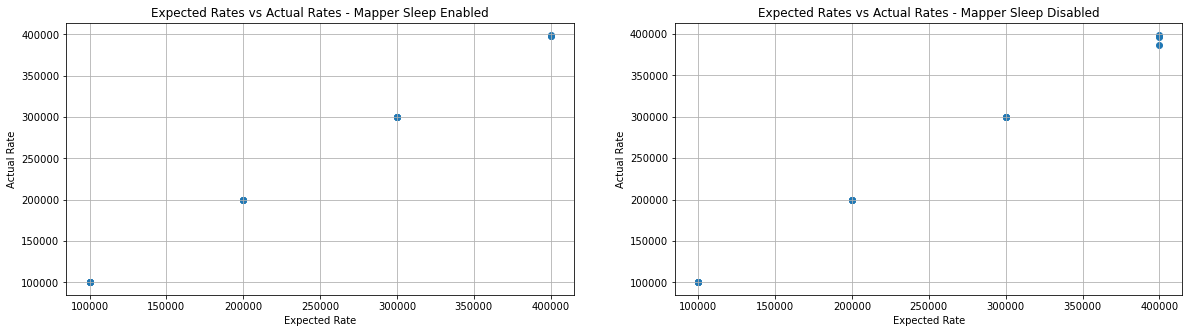

In [10]:
import matplotlib.pyplot as plt
plt.figure()

fig, plots = plt.subplots(1, 2, figsize=(20, 5))

plots[0].scatter(dfEnabled['rate'], dfEnabled['SourcenumRecordsOutPerSecond_avg'])
plots[0].set_xlabel("Expected Rate")
plots[0].set_ylabel("Actual Rate")
plots[0].set_title("Expected Rates vs Actual Rates - Mapper Sleep Enabled")
plots[0].grid(True)

plots[1].scatter(dfDisabled['rate'], dfDisabled['SourcenumRecordsOutPerSecond_avg'])
plots[1].set_xlabel("Expected Rate")
plots[1].set_ylabel("Actual Rate")
plots[1].set_title("Expected Rates vs Actual Rates - Mapper Sleep Disabled")
plots[1].grid(True)

plt.show()

<Figure size 432x288 with 0 Axes>

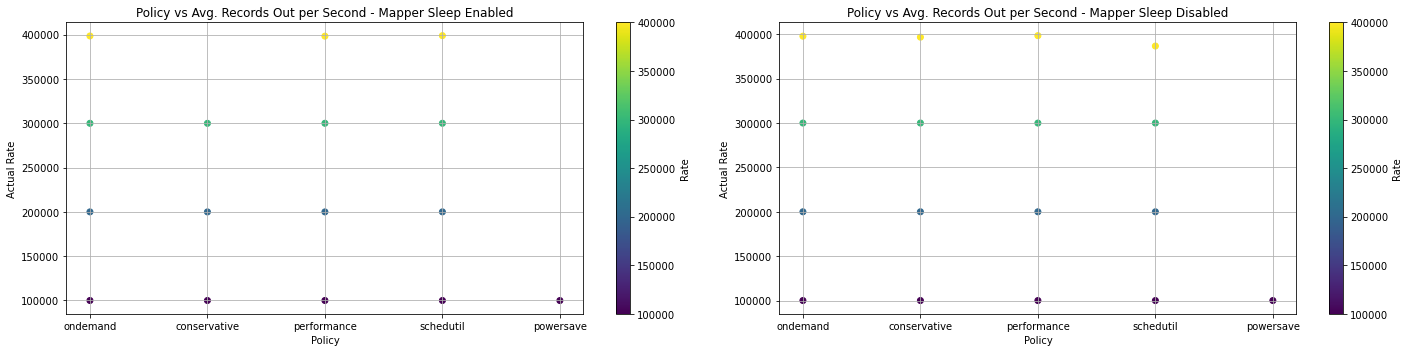

In [11]:
cmap = 'viridis'
plt.figure()
fig, plots = plt.subplots(1, 2, figsize=(20, 5))

scatter1 = plots[0].scatter(dfEnabled['policy'], dfEnabled['SourcenumRecordsOutPerSecond_avg'], c=dfEnabled['rate'], cmap=cmap)
plots[0].set_xlabel("Policy")
plots[0].set_ylabel("Actual Rate")
plots[0].set_title("Policy vs Avg. Records Out per Second - Mapper Sleep Enabled")
plots[0].grid(True)
plt.colorbar(scatter1, ax=plots[0], label='Rate')

scatter2 = plots[1].scatter(dfDisabled['policy'], dfDisabled['SourcenumRecordsOutPerSecond_avg'], c=dfDisabled['rate'], cmap=cmap)
plots[1].set_xlabel("Policy")
plots[1].set_ylabel("Actual Rate")
plots[1].set_title("Policy vs Avg. Records Out per Second - Mapper Sleep Disabled")
plots[1].grid(True)
plt.colorbar(scatter2, ax=plots[1], label='Rate')

plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

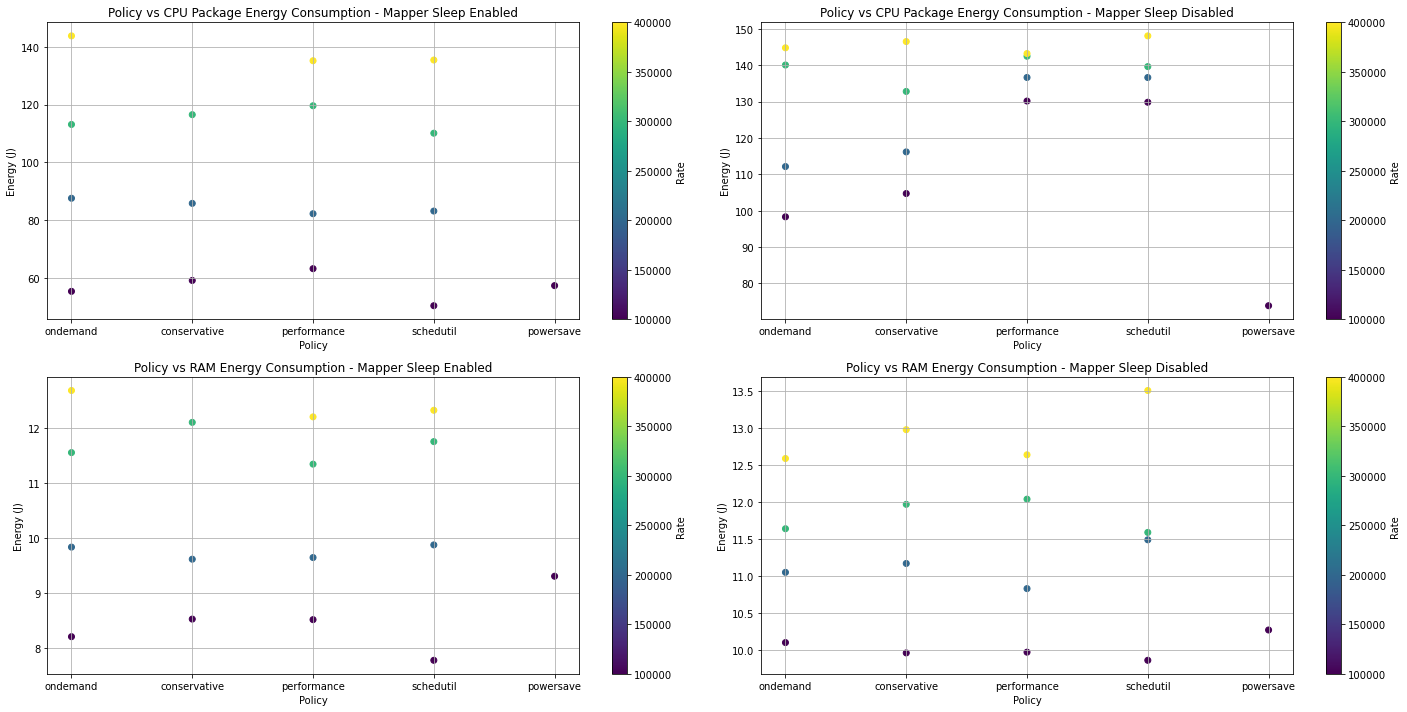

In [12]:
cmap = 'viridis'
plt.figure()
fig, plots = plt.subplots(2, 2, figsize=(20, 10))

scatter1 = plots[0][0].scatter(dfEnabled['policy'], dfEnabled['pkg_watts_avg'], c=dfEnabled['rate'], cmap=cmap)
plots[0][0].set_xlabel("Policy")
plots[0][0].set_ylabel("Energy (J)")
plots[0][0].set_title("Policy vs CPU Package Energy Consumption - Mapper Sleep Enabled")
plots[0][0].grid(True)
plt.colorbar(scatter1, ax=plots[0][0], label='Rate')

scatter2 = plots[0][1].scatter(dfDisabled['policy'], dfDisabled['pkg_watts_avg'], c=dfDisabled['rate'], cmap=cmap)
plots[0][1].set_xlabel("Policy")
plots[0][1].set_ylabel("Energy (J)")
plots[0][1].set_title("Policy vs CPU Package Energy Consumption - Mapper Sleep Disabled")
plots[0][1].grid(True)
plt.colorbar(scatter2, ax=plots[0][1], label='Rate')

scatter3 = plots[1][0].scatter(dfEnabled['policy'], dfEnabled['ram_watts_avg'], c=dfEnabled['rate'], cmap=cmap)
plots[1][0].set_xlabel("Policy")
plots[1][0].set_ylabel("Energy (J)")
plots[1][0].set_title("Policy vs RAM Energy Consumption - Mapper Sleep Enabled")
plots[1][0].grid(True)
plt.colorbar(scatter3, ax=plots[1][0], label='Rate')

scatter4 = plots[1][1].scatter(dfDisabled['policy'], dfDisabled['ram_watts_avg'], c=dfDisabled['rate'], cmap=cmap)
plots[1][1].set_xlabel("Policy")
plots[1][1].set_ylabel("Energy (J)")
plots[1][1].set_title("Policy vs RAM Energy Consumption - Mapper Sleep Disabled")
plots[1][1].grid(True)
plt.colorbar(scatter4, ax=plots[1][1], label='Rate')

plt.tight_layout()
plt.show()


In [13]:
best = 0
rate = 0
policy = ""

for idx, entry in dfEnabled.iterrows():
    if entry["rate"] / entry["pkg_watts_avg"] > best:
        best = entry["rate"] / entry["pkg_watts_avg"]
        rate = entry["rate"]
        policy = entry["policy"]
        
print("Best Rate/Power ratio overall with sleep enabled: ", best, rate, policy)

best = 0
rate = 0
policy = ""
for idx, entry in dfDisabled.iterrows():
    if entry["rate"] / entry["pkg_watts_avg"] > best:
        best = entry["rate"] / entry["pkg_watts_avg"]
        rate = entry["rate"]
        policy = entry["policy"]
        
print("Best Rate/Power ratio overall with sleep disabled: ", best, rate, policy)

Best Rate/Power ratio overall with sleep enabled:  2959.23651697862 400000 performance
Best Rate/Power ratio overall with sleep disabled:  2792.711024226768 400000 performance


In [14]:
import pandas as pd

# Assuming dfEnabled is already defined and contains the necessary data

# Initialize DataFrame
optimalDf = pd.DataFrame(columns=["Rate", "Rate/Power Ratio", "Policy"])

for rate in range(100000, 700000, 100000):
    bestratio = 0
    bestrate = 0
    policy = ""
    for idx, entry in dfEnabled.iterrows():
        if (entry["rate"] / entry["pkg_watts_avg"] > bestratio) and (entry["rate"] == rate):
            bestratio = entry["rate"] / entry["pkg_watts_avg"]
            bestrate = entry["rate"]
            policy = entry["policy"]

    # Append row to DataFrame
    new_row = {"Rate": [rate], "Rate/Power Ratio": [bestratio], "Policy": [policy]}
    new_df = pd.DataFrame(new_row)
    optimalDf = pd.concat([optimalDf, new_df], ignore_index=True)

# Display the DataFrame
display(optimalDf)

/tmp/ipykernel_835244/2804175473.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  optimalDf = pd.concat([optimalDf, new_df], ignore_index=True)


,Rate,Rate/Power Ratio,Policy
0,100000,1984.520738,schedutil
1,200000,2432.202359,performance
2,300000,2725.043147,schedutil
3,400000,2959.236517,performance
4,500000,0.000000,
5,600000,0.000000,
